<a href="https://colab.research.google.com/github/vivek45-guru-cell/Machine-Learning-Projects/blob/main/Medals_A_country_Win_in_OLYMPICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothesis**
We can predict how many medals a country will win at the Olympics by using historical data.

# **The Data**
A dataset of how many medals each country won at each Olympics. Other data would also be nice (number of athletes, etc).

In [ ]:
import pandas as pd

In [ ]:
path="/content/drive/MyDrive/Dataset/teams.csv"
df=pd.read_csv(path)
df

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [ ]:
df=df[["team","country","year","events","athletes","age","prev_medals","medals"]]
df

,team,country,year,events,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,5,18.6,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,11,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,15,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,8,9,27.3,4.0,0


In [ ]:
df.select_dtypes(include=['number']).corr()["medals"]

,medals
year,-0.021603
events,0.771330
athletes,0.840817
age,0.025096
prev_medals,0.920048
medals,1.000000


In [ ]:
import seaborn as sns

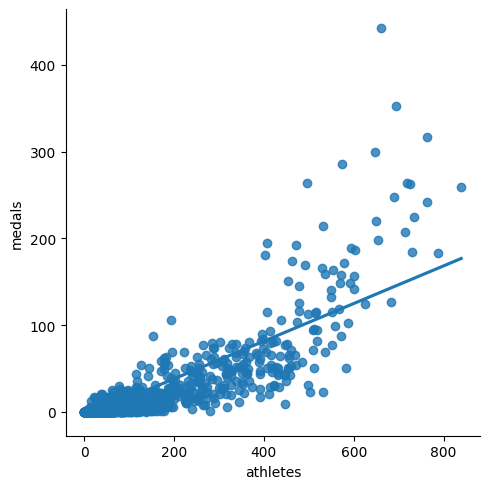

In [ ]:
sns.lmplot(x="athletes",y="medals",data=df,fit_reg=True,ci=None)

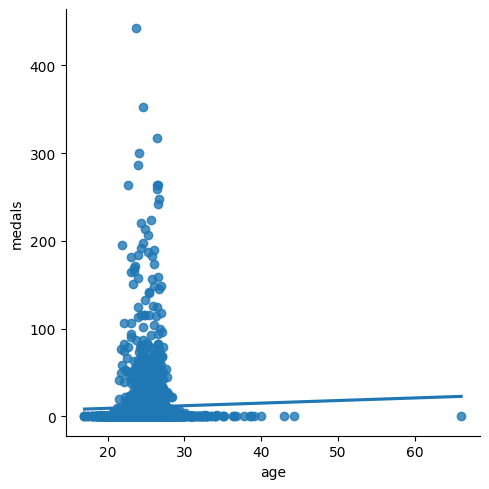

In [ ]:
sns.lmplot(x="age",y="medals",data=df,fit_reg=True,ci=None)

<Axes: ylabel='Frequency'>

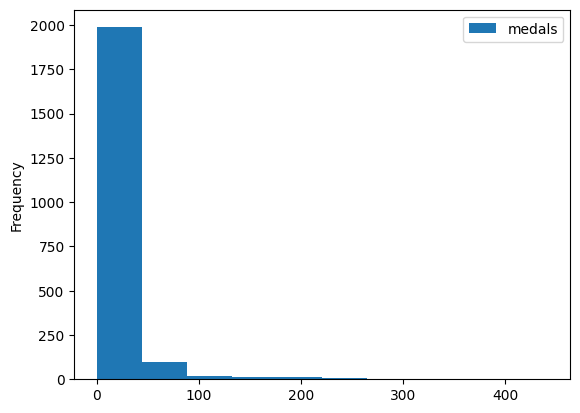

In [ ]:
df.plot.hist(y="medals")

In [23]:
df[df.isnull().any(axis=1)].head(20)

,team,country,year,events,athletes,age,prev_medals,medals


In [25]:
df=df.dropna()
df

,team,country,year,events,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,5,18.6,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,11,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,15,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,8,9,27.3,4.0,0


In [26]:
df.shape

(2014, 8)

In [27]:
train=df[df["year"]<2012].copy()
test=df[df["year"]>=2012].copy()

In [22]:
#about 80% of data
train.shape

(1609, 8)

In [21]:
#about 20% of data
test.shape

(405, 8)

In [28]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [29]:
predictors=["athletes","prev_medals"]


In [30]:
reg.fit(train[predictors],train["medals"])

LinearRegression()

In [31]:
predictions=reg.predict(test[predictors])

In [32]:
predictions.shape

(405,)

In [33]:
test["predictions"]=predictions

In [34]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [35]:
test["predictions"] = test["predictions"].round()

In [36]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2987654320987656

In [38]:
df.describe()["medals"]

,medals
count,2014.000000
mean,10.990070
std,33.627528
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,442.000000


In [39]:
test["predictions"] = predictions

In [40]:
test[test["team"]=="USA"]

,team,country,year,events,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,245,689,26.7,317.0,248,285.210121
2054,USA,United States,2016,245,719,26.4,248.0,264,235.568076


In [41]:
test[test["team"] == "IND"]

,team,country,year,events,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,55,95,26.0,3.0,6,6.921667
908,IND,India,2016,67,130,26.1,6.0,2,11.683176


In [42]:
errors = (test["medals"] - predictions).abs()

In [43]:
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = test["medals"].groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team

In [44]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

<Axes: ylabel='Frequency'>

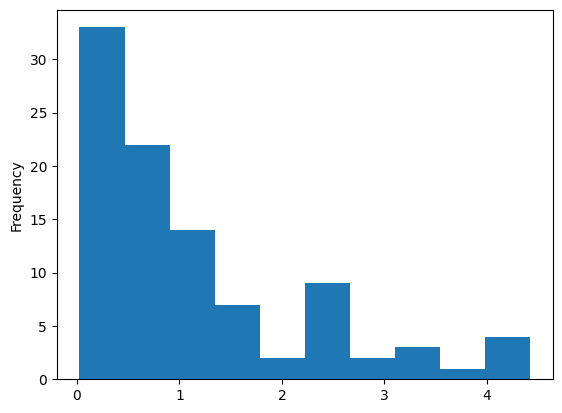

In [45]:
error_ratio.plot.hist()

In [46]:
error_ratio.sort_values()

,medals
team,
FRA,0.024289
CAN,0.050844
NZL,0.071349
RUS,0.081841
ITA,0.119537
...,...
PHI,3.563248
JOR,4.065175
BDI,4.136878
